#O quanto o bairro significa no valor do metro quadrado?

### Grupo: Enzo Bressan Crivellaro, João Leão de Campos Andrade, Paulo Renato Restaino

Este projeto tem como objetivo, por meio de dados raspados do site:"https://www.lugarcerto.com.br/busca/compra-e-venda/sp/sao-paulo/apartamento", responder com a informações de diversos imóveis a seguinte questão: A escolha de imóveis em diferentes bairros pode influenciar no preço?

##1ª Etapa - Criação do ***Dataset***

Já tendo a questão dirigida (QD), o próximo passo enfim seria criar um Dataset para coletar os dados.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

In [ ]:
pagina1 = requests.get("https://www.lugarcerto.com.br/busca/compra-e-venda/sp/sao-paulo/apartamento")

lugar_certo = BeautifulSoup(pagina1.content, "html.parser")

dados_im = lugar_certo.find_all(class_="item-descricao-conteudo margin-right-5")
tipo_im = lugar_certo.find_all(class_="text-bold margin-top-0 margin-bottom-0 item-titulo col-sxs-12 col-xs-9")
localizacao_im = lugar_certo.find_all(class_="resultados-da-busca-localizacao")
valor_im = lugar_certo.find_all(class_="item-valor text-gray-dark margin-top-0 margin-bottom-20 pull-left")
descricao_im = lugar_certo.find_all(class_="text-small text-overflow-40 margin-bottom-20")
description_im = lugar_certo.find_all(class_="item-descricao text-bold clearfix")

area = []
quarto = []
vaga = []
banheiro = []

description = []

estado = []
cidade = []
bairro = []

def tipo_local_preco():
  for ml in tipo_im:
    tipo.append(ml.get_text())


  for ml in localizacao_im:
    local = ml.get_text()
    local = local.split()
    estado.append(local[-1])
    cidade.append(local[-3] + " " + local[-2])
    bairro.append(local[-4])


  for ml in valor_im:
    reais = ml.get_text()
    reais = reais.replace("R", "")
    reais = reais.replace("$", "")
    reais = reais.replace(".", "")
    reais = reais.replace(" ", "")
    reais = reais.replace(",", ".")
    preco.append(float(reais))


for ml in description_im:
    description.append(ml.get_text())

quarto_v = False 
vaga_v = False
banheiro_v = False

for i, ml in enumerate(dados_im):
  
  if (description[i] == 'ÁREA'):
    if i != 0:
      if quarto_v == False:
        quarto.append(0)
      else: 
         quarto_v = False 

      if vaga_v == False:
        vaga.append(0)
      else: 
         vaga_v = False 
      
      if banheiro_v == False:
        banheiro.append(0)
      else: 
         banheiro_v = False 

    area_to_int = ml.get_text()
    area.append(int(area_to_int))

  if (description[i] == 'QUARTO(S)'):
    quarto_v = True
    quarto.append(int(ml.get_text()))

  if (description[i] == 'VAGA(S)'):
    vaga_v = True
    vaga.append(int(ml.get_text()))
  if (description[i] == 'BANHEIRO(S)'):
    banheiro_v = True
    banheiro.append(int(ml.get_text()))
  if i == 127:
    if quarto_v == False:
        quarto.append(0)
    else: 
       quarto_v = False 

    if vaga_v == False:
       vaga.append(0)
    else: 
       vaga_v = False 
      
    if banheiro_v == False:
       banheiro.append(0)
    else: 
       banheiro_v = False 


tipo = []
local = []
preco = []

tipo_local_preco()


for numero_paginas in range (12):
  # O número colocado aqui  ^^^^^ define quantas páginas + 1 vão ser usadas para fazer o dataset (cada página tem 10 imóveis)

  x = "https://www.lugarcerto.com.br/busca/compra-e-venda/sp/sao-paulo/apartamento?offset=" + str((numero_paginas + 1)*20)

  pagina2 = requests.get(x)

  lugar_certo2 = BeautifulSoup(pagina2.content, "html.parser")

  dados_im = lugar_certo2.find_all(class_="item-descricao-conteudo margin-right-5")
  tipo_im = lugar_certo2.find_all(class_="text-bold margin-top-0 margin-bottom-0 item-titulo col-sxs-12 col-xs-9")
  localizacao_im = lugar_certo2.find_all(class_="resultados-da-busca-localizacao")
  valor_im = lugar_certo2.find_all(class_="item-valor text-gray-dark margin-top-0 margin-bottom-20 pull-left")
  descricao_im = lugar_certo2.find_all(class_="text-small text-overflow-40 margin-bottom-20")
  description_im = lugar_certo2.find_all(class_="item-descricao text-bold clearfix")

  for ml in description_im:
    description.append(ml.get_text())

 
  quarto_v = False
  vaga_v = False
  banheiro_v = False

  checker = 0

  ex3 = 0
  ex2 = 0
  ex1 = 0
  examiner = 0

  for i, ml in enumerate(dados_im):
  
    ex3 = ex2
    ex2 = ex1
    ex1 = examiner
    examiner = ml.get_text()
    examiner = examiner.replace(" ", "")
    examiner = int(examiner)

    if examiner >= 12:
      area.append(examiner)
      if checker == 3: 
        quarto.append(ex3)
        vaga.append(ex2)
        banheiro.append(ex1)
        checker = 0
      elif checker == 2:  
        quarto.append(ex2)
        vaga.append(0)
        banheiro.append(ex1)
        checker = 0
      elif checker == 1:
        quarto.append(ex1)
        vaga.append(0)
        banheiro.append(0)
        checker = 0
    elif examiner < 12:
      checker +=1

  if len(quarto) < len(area):
    quarto.append(0)
  if len(vaga) < len(area):
    vaga.append(0)
  if len(banheiro) < len(area):
    banheiro.append(0) 

  tipo_local_preco()

del area[::2]  
del quarto[::2] 
del vaga[::2]   
del banheiro[::2]  

# ------------------------------- MARGEM DE ERRO -------------------------------
mr = 0.0

while len(tipo)> len(area):
  area.append(0)
  mr += 1
while len(area)> len(quarto):
  quarto.append(0)
  mr += 1
while len(area)> len(vaga):
  vaga.append(0)
  mr += 1  
while len(area)> len(banheiro):
  banheiro.append(0)
  mr += 1

mr = mr/4

mr = mr/len(tipo)

mr = mr*100

print("Margem de erro de: ", mr, "%")

# ------------------------------------------------------------------------------

pd.set_option("display.max_rows", None, "display.max_columns", None)
imoveis_lc = pd.DataFrame({
    "Tipo de imóvel": tipo,
    "Estado": estado,
    "Cidade": cidade,
    "Bairro": bairro,
    "Área": area,
    "Quantidade de quartos": quarto,
    "Quantidade de vagas": vaga,
    "Quantidade de banheiros": banheiro,
    "Preço": preco
})

preco_por_area = imoveis_lc['Preço']/imoveis_lc["Área"]
imoveis_lc['Preço por metro quadrado'] = preco_por_area

imoveis_lc

Margem de erro de:  0.2884615384615385 %


,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
0,"Apartamento, 1 Quarto, 1 Vaga, 1 Suite",SP,"São Paulo,","Indianópolis,",27,1,1,1,350000.0,12962.962963
1,"Apartamento, 1 Quarto, 1 Vaga, 1 Suite",SP,"São Paulo,","Indianópolis,",27,1,1,1,350000.0,12962.962963
2,"Apartamento, 4 Quartos, 2 Vagas, 1 Suite",SP,"São Paulo,","Mooca,",160,4,2,3,900000.0,5625.000000
3,"Apartamento, 1 Quarto, 1 Vaga",SP,"São Paulo,","Indianópolis,",38,1,1,1,394000.0,10368.421053
4,"Apartamento, 3 Quartos, 2 Vagas, 2 Suites",SP,"São Paulo,","Jardins,",184,3,2,3,1600000.0,8695.652174
5,"Apartamento, 1 Quarto, 1 Vaga",SP,"São Paulo,","Mariana,",45,1,1,1,447000.0,9933.333333
6,"Apartamento, 4 Quartos, 2 Vagas, 2 Suites",SP,"São Paulo,","Belenzinho,",115,4,2,2,680000.0,5913.043478
7,"Apartamento, 3 Quartos",SP,"São Paulo,","Andrade,",70,3,0,2,320000.0,4571.428571
8,"Apartamento, 2 Quartos",SP,"São Paulo,","Novo,",127,2,0,3,930000.0,7322.834646
9,"Apartamento, 2 Quartos",SP,"São Paulo,","Perdizes,",101,2,0,0,650000.0,6435.643564


Comando utilizado para exportar o CSV do dataset

In [ ]:
imoveis_lc.to_csv("CSV_imoveis.csv")

##2ª Etapa - Estudando os dados

Agora, tendo um Dataset com várias informações bem distribuídas, é necessário analisar essas informações, para isso o grupo fez diversas tabelas e gráficos que auxiliam a encontrar diferentes bairros para estudar mais a fundo e ver como o preço poderia se aplicar em diferentes áreas e regiões.

In [ ]:
bairro_df = imoveis_lc.groupby(['Bairro']).Preço.agg([len, min, max])
bairro_df

,len,min,max
Bairro,,,
"Aclimação,",2.0,3150000.0,16000000.0
"Amaro,",1.0,599000.0,599000.0
"América,",2.0,424000.0,2500000.0
"Anastácio,",1.0,634000.0,634000.0
"Andrade,",4.0,320000.0,860000.0
"Antonieta,",1.0,265000.0,265000.0
"Barreto,",1.0,599000.0,599000.0
"Belenzinho,",1.0,680000.0,680000.0
"Belo,",7.0,429000.0,1700000.0


In [ ]:
bairro_df.sort_values(by='max', ascending= False)


,len,min,max
Bairro,,,
"Aclimação,",2.0,3150000.0,16000000.0
"Higienópolis,",8.0,620000.0,7950000.0
"Perdizes,",13.0,650000.0,4397000.0
"Matilde,",4.0,277000.0,4200000.0
"Leopoldina,",10.0,429000.0,3937000.0
"Paraíso,",1.0,3600000.0,3600000.0
"Moema,",17.0,381000.0,3500000.0
"Feijó,",3.0,1100000.0,3500000.0
"Bibi,",2.0,1000000.0,3390000.0


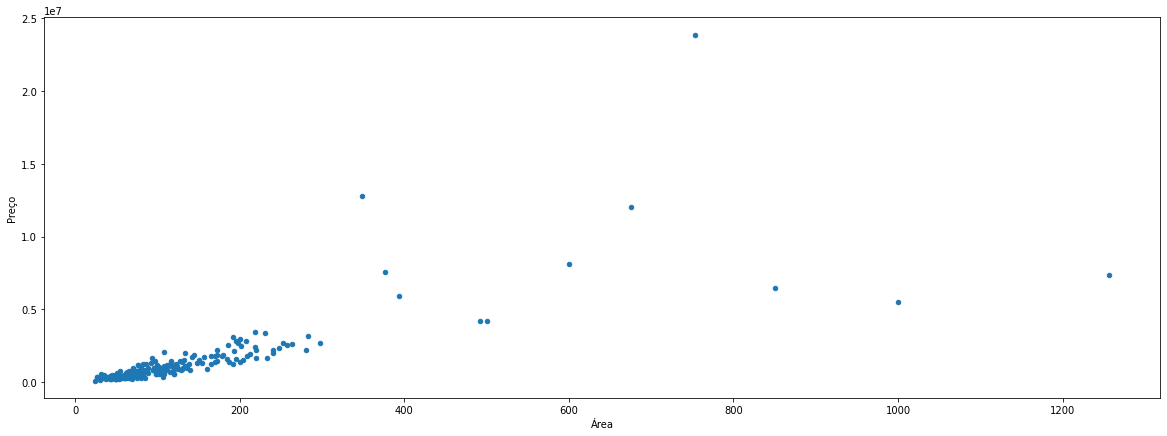

In [ ]:
imoveis_lc.plot(figsize=(20, 7),kind='scatter',x='Área',y='Preço')


Text(0, 0.5, 'Preço')

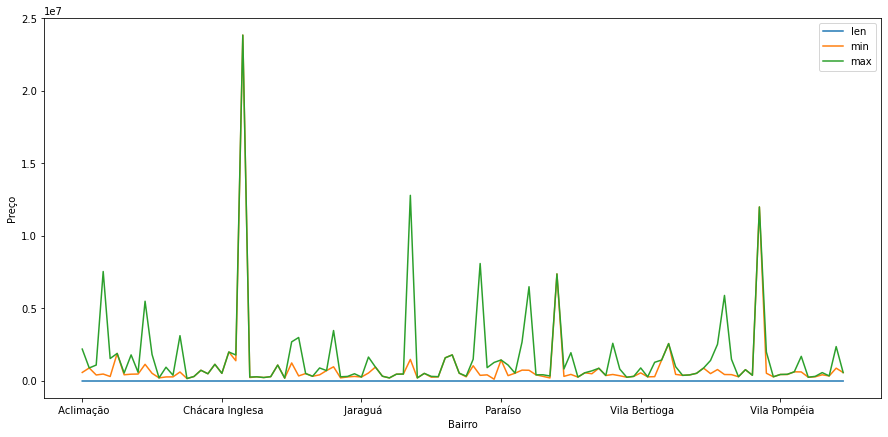

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
bairro_df.plot()
plt.ylabel('Preço')

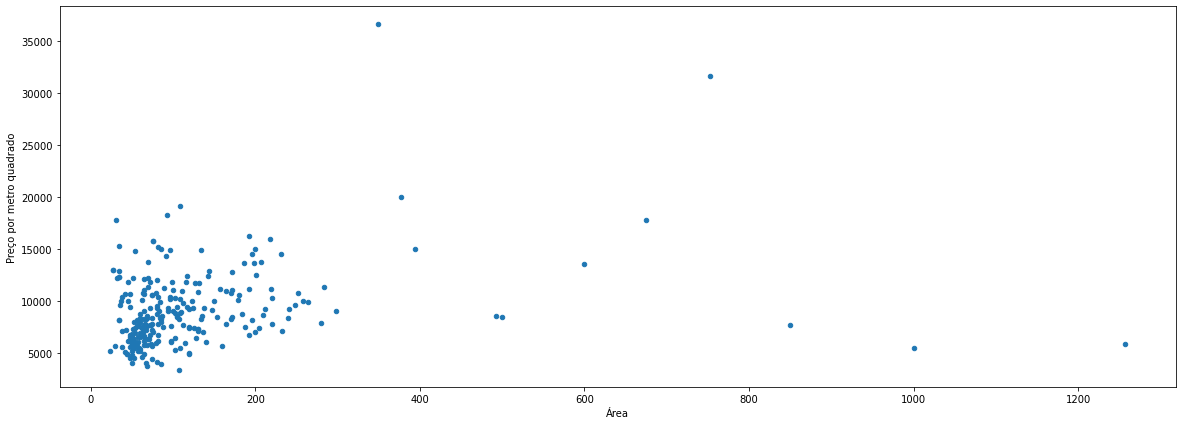

In [ ]:
imoveis_lc.plot(figsize=(20, 7),kind='scatter',x='Área',y='Preço por metro quadrado')


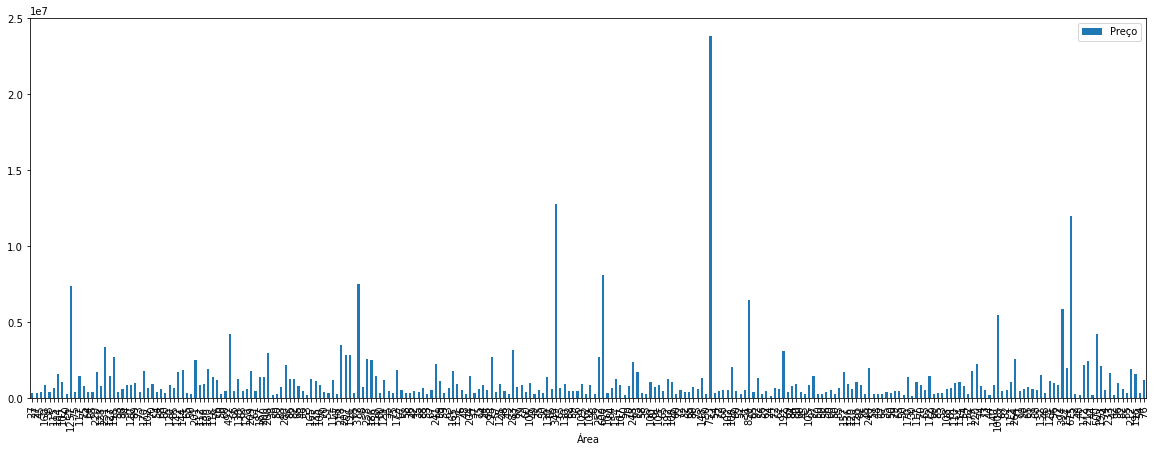

In [ ]:
imoveis_lc.plot(figsize=(20, 7),kind='bar', x='Área', y='Preço')

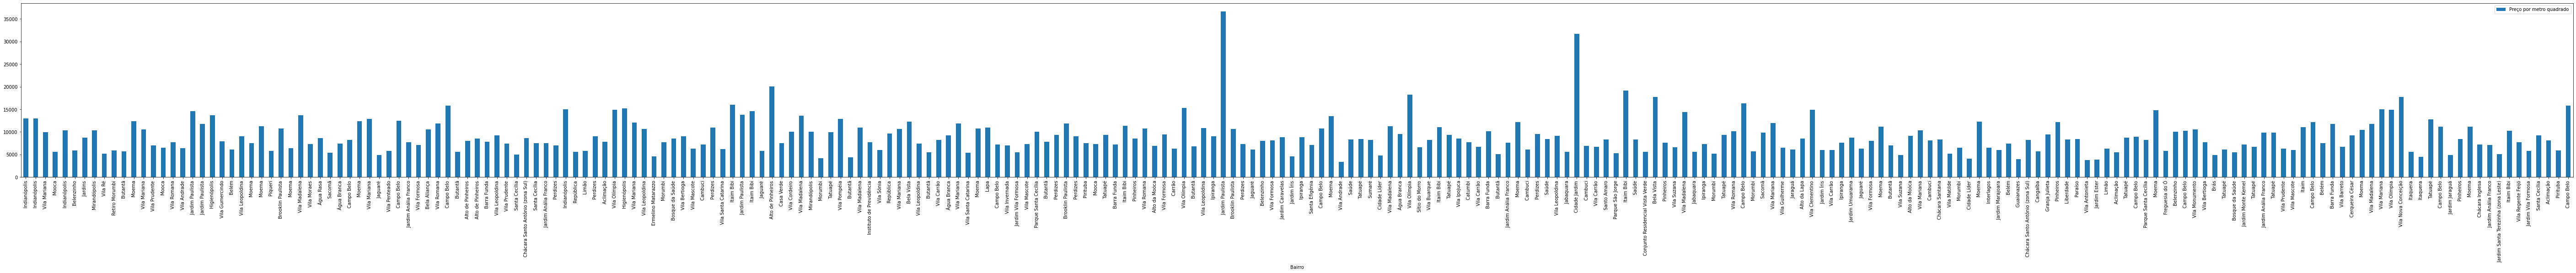

In [ ]:
imoveis_lc.plot(figsize=(100, 7),kind='bar', x='Bairro', y='Preço por metro quadrado')


Text(0.5, 0, 'Metro quadrado')

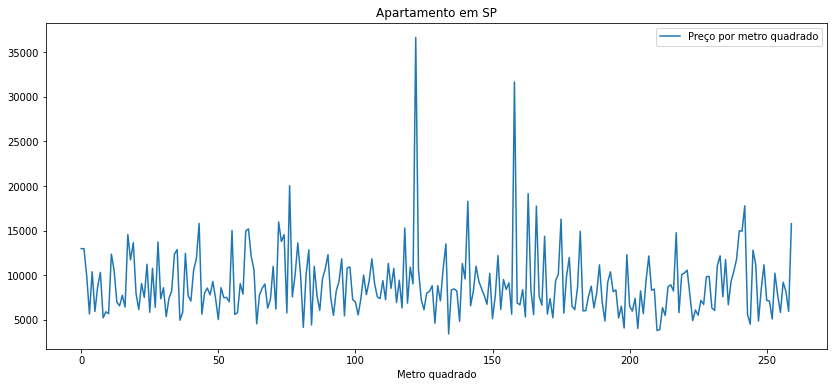

In [ ]:
plt.figure(figsize=(14,6))
plt.title("Apartamento em SP")
sns.lineplot(data=imoveis_lc['Preço por metro quadrado'], label="Preço por metro quadrado")
plt.xlabel("Metro quadrado")



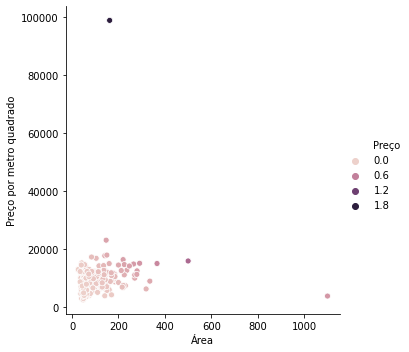

In [ ]:

sns.relplot( x="Área", y="Preço por metro quadrado", hue='Preço',data=imoveis_lc);
# Lembrando que preço.e7

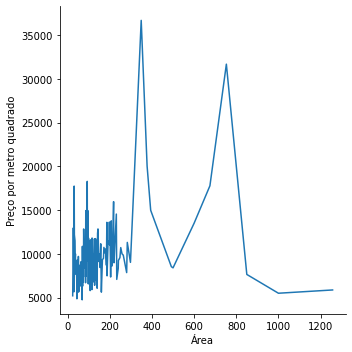

In [ ]:
sns.relplot(x="Área", y="Preço por metro quadrado", ci=None, kind="line", data=imoveis_lc);

##3ª Etapa - ***Dataset*** por bairro

Depois de visualizar detalhadamente os dados obtidos, um seleto grupo de bairros foi separado para a criação de um dataset próprio para cada bairro e por sua vez um último dataset que reuniria as informações da média e mediana do preço do metro quadrado de todos os bairros escolhidos para a análise final.

In [ ]:
Medias = []
Medianas = []
Bairro_selecionado = []

In [ ]:
indianopolis = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Indianópolis,"])

Medias.append(indianopolis['Preço por metro quadrado'].mean())
Medianas.append(indianopolis['Preço por metro quadrado'].median())
Bairro_selecionado.append("Indianopolis")

indianopolis

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
0,"Apartamento, 1 Quarto, 1 Vaga, 1 Suite",SP,"São Paulo,","Indianópolis,",27,1,1,1,350000.0,12962.962963
1,"Apartamento, 1 Quarto, 1 Vaga, 1 Suite",SP,"São Paulo,","Indianópolis,",27,1,1,1,350000.0,12962.962963
3,"Apartamento, 1 Quarto, 1 Vaga",SP,"São Paulo,","Indianópolis,",38,1,1,1,394000.0,10368.421053


In [ ]:
perdizes = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Perdizes,"])

Medias.append(perdizes['Preço por metro quadrado'].mean())
Medianas.append(perdizes['Preço por metro quadrado'].median())
Bairro_selecionado.append("Perdizes")

perdizes

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
9,"Apartamento, 2 Quartos",SP,"São Paulo,","Perdizes,",101,2,0,0,650000.0,6435.643564
15,"Apartamento, 3 Quartos",SP,"São Paulo,","Perdizes,",97,3,0,3,760000.0,7835.051546
21,"Apartamento, 4 Quartos",SP,"São Paulo,","Perdizes,",154,4,0,4,1330000.0,8636.363636
28,"Apartamento, 4 Quartos",SP,"São Paulo,","Perdizes,",225,4,0,0,3300000.0,14666.666667
64,"Apartamento, 3 Quartos",SP,"São Paulo,","Perdizes,",133,3,0,0,1450000.0,10902.255639
90,"Apartamento, 1 Quarto",SP,"São Paulo,","Perdizes,",56,1,0,1,790000.0,14107.142857
97,"Apartamento, 4 Quartos",SP,"São Paulo,","Perdizes,",291,4,0,0,4397000.0,15109.965636
114,"Apartamento, 3 Quartos",SP,"São Paulo,","Perdizes,",236,3,0,5,2995000.0,12690.677966
120,"Apartamento, 3 Quartos",SP,"São Paulo,","Perdizes,",120,3,0,0,980000.0,8166.666667
124,"Apartamento, 2 Quartos",SP,"São Paulo,","Perdizes,",74,2,0,2,960000.0,12972.972973


In [ ]:
Mariana = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Mariana,"])

Medias.append(perdizes['Preço por metro quadrado'].mean())
Medianas.append(perdizes['Preço por metro quadrado'].median())
Bairro_selecionado.append("Vila Mariana")

Mariana

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
5,"Apartamento, 1 Quarto, 1 Vaga",SP,"São Paulo,","Mariana,",45,1,1,1,447000.0,9933.333333
52,"Apartamento, 3 Quartos",SP,"São Paulo,","Mariana,",105,3,0,2,1065000.0,10142.857143
56,"Apartamento, 2 Quartos",SP,"São Paulo,","Mariana,",92,2,0,3,1012500.0,11005.434783
109,"Apartamento, 2 Quartos",SP,"São Paulo,","Mariana,",136,2,0,4,1947000.0,14316.176471
209,"Apartamento, 4 Quartos",SP,"São Paulo,","Mariana,",136,4,0,4,1370000.0,10073.529412
237,"Apartamento, 3 Quartos",SP,"São Paulo,","Mariana,",220,3,0,5,1650000.0,7500.000000
247,"Apartamento, 3 Quartos",SP,"São Paulo,","Mariana,",115,3,0,1,1415793.0,12311.243478


In [ ]:
Tatuape = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Tatuapé,"])

Medias.append(Tatuape['Preço por metro quadrado'].mean())
Medianas.append(Tatuape['Preço por metro quadrado'].median())
Bairro_selecionado.append("Tatuapé")


Tatuape

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
18,"Apartamento, 3 Quartos",SP,"São Paulo,","Tatuapé,",118,3,0,4,1300000.0,11016.949153
46,"Apartamento, 3 Quartos",SP,"São Paulo,","Tatuapé,",62,3,0,2,510000.0,8225.806452
69,"Apartamento, 2 Quartos",SP,"São Paulo,","Tatuapé,",62,2,0,2,450000.0,7258.064516
71,"Apartamento, 3 Quartos",SP,"São Paulo,","Tatuapé,",152,3,0,3,1300000.0,8552.631579
99,"Apartamento, 3 Quartos",SP,"São Paulo,","Tatuapé,",106,0,0,0,800000.0,7547.169811
115,"Apartamento, 3 Quartos",SP,"São Paulo,","Tatuapé,",64,3,0,2,490000.0,7656.250000
136,"Apartamento, 1 Quarto",SP,"São Paulo,","Tatuapé,",50,1,0,1,515000.0,10300.000000
167,"Apartamento, 2 Quartos",SP,"São Paulo,","Tatuapé,",56,2,0,2,420000.0,7500.000000
182,"Apartamento, 3 Quartos",SP,"São Paulo,","Tatuapé,",92,3,0,3,752000.0,8173.913043
200,"Apartamento, 2 Quartos",SP,"São Paulo,","Tatuapé,",54,2,0,1,370000.0,6851.851852


In [ ]:
Mooca = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Mooca,"])

Medias.append(Mooca['Preço por metro quadrado'].mean())
Medianas.append(Mooca['Preço por metro quadrado'].median())
Bairro_selecionado.append("Mooca")

Mooca

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
2,"Apartamento, 4 Quartos, 2 Vagas, 1 Suite",SP,"São Paulo,","Mooca,",160,4,2,3,900000.0,5625.000000
65,"Apartamento, 3 Quartos",SP,"São Paulo,","Mooca,",100,3,0,2,890000.0,8900.000000
93,"Apartamento, 4 Quartos",SP,"São Paulo,","Mooca,",184,4,0,3,2100000.0,11413.043478
174,"Apartamento, 3 Quartos",SP,"São Paulo,","Mooca,",141,3,0,2,550000.0,3900.709220
185,"Apartamento, 3 Quartos",SP,"São Paulo,","Mooca,",110,3,0,1,560000.0,5090.909091


In [ ]:
Jardins = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Jardins,"])

Medias.append(Jardins['Preço por metro quadrado'].mean())
Medianas.append(Jardins['Preço por metro quadrado'].median())
Bairro_selecionado.append("Jardins")

Jardins

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
4,"Apartamento, 3 Quartos, 2 Vagas, 2 Suites",SP,"São Paulo,","Jardins,",184,3,2,3,1600000.0,8695.652174


In [ ]:
Belenzinho = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Belenzinho,"])

Medias.append(Belenzinho['Preço por metro quadrado'].mean())
Medianas.append(Belenzinho['Preço por metro quadrado'].median())
Bairro_selecionado.append("Belenzinho")

Belenzinho

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
6,"Apartamento, 4 Quartos, 2 Vagas, 2 Suites",SP,"São Paulo,","Belenzinho,",115,4,2,2,680000.0,5913.043478


In [ ]:
Pirituba = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Pirituba,"])

Medias.append(Pirituba['Preço por metro quadrado'].mean())
Medianas.append(Pirituba['Preço por metro quadrado'].median())
Bairro_selecionado.append("Pirituba")

Pirituba

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
135,"Apartamento, 3 Quartos",SP,"São Paulo,","Pirituba,",107,3,0,4,880000.0,8224.299065
172,"Apartamento, 2 Quartos",SP,"São Paulo,","Pirituba,",47,2,0,1,300000.0,6382.978723
219,"Apartamento, 3 Quartos",SP,"São Paulo,","Pirituba,",85,0,0,0,689000.0,8105.882353
220,"Apartamento, 3 Quartos",SP,"São Paulo,","Pirituba,",131,3,0,3,1080000.0,8244.274809


In [ ]:
Pinheiros = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Pinheiros,"])

Medias.append(Pinheiros['Preço por metro quadrado'].mean())
Medianas.append(Pinheiros['Preço por metro quadrado'].median())
Bairro_selecionado.append("Pinheiros")

Pinheiros

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
34,"Apartamento, 3 Quartos",SP,"São Paulo,","Pinheiros,",141,3,0,3,1250000.0,8865.248227
41,"Apartamento, 2 Quartos",SP,"São Paulo,","Pinheiros,",57,2,0,2,759100.0,13317.543860
43,"Apartamento, 1 Quarto",SP,"São Paulo,","Pinheiros,",42,1,0,1,639880.0,15235.238095
57,"Apartamento, 3 Quartos",SP,"São Paulo,","Pinheiros,",70,3,0,2,756000.0,10800.000000
75,"Apartamento, 2 Quartos",SP,"São Paulo,","Pinheiros,",55,2,0,2,639999.0,11636.345455
95,"Apartamento, 2 Quartos",SP,"São Paulo,","Pinheiros,",84,2,0,1,1450000.0,17261.904762
225,"Apartamento, 2 Quartos",SP,"São Paulo,","Pinheiros,",90,2,0,2,595000.0,6611.111111
249,"Apartamento, 2 Quartos",SP,"São Paulo,","Pinheiros,",92,2,0,0,899000.0,9771.739130


In [ ]:
Higienópolis = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Higienópolis,"])

Medias.append(Higienópolis['Preço por metro quadrado'].mean())
Medianas.append(Higienópolis['Preço por metro quadrado'].median())
Bairro_selecionado.append("Higienópolis")

Higienópolis

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
17,"Apartamento, 4 Quartos",SP,"São Paulo,","Higienópolis,",179,4,0,3,1700000.0,9497.206704
27,"Apartamento, 3 Quartos",SP,"São Paulo,","Higienópolis,",62,3,0,1,620000.0,10000.000000
54,"Apartamento, 4 Quartos",SP,"São Paulo,","Higienópolis,",500,4,0,2,7950000.0,15900.000000
92,"Apartamento, 3 Quartos",SP,"São Paulo,","Higienópolis,",366,3,0,5,5500000.0,15027.322404
100,"Apartamento, 3 Quartos",SP,"São Paulo,","Higienópolis,",170,3,0,2,1550000.0,9117.647059
227,"Apartamento, 3 Quartos",SP,"São Paulo,","Higienópolis,",141,3,0,1,1485000.0,10531.914894
228,"Apartamento, 2 Quartos",SP,"São Paulo,","Higienópolis,",125,2,0,1,1100000.0,8800.000000
256,"Apartamento, 3 Quartos",SP,"São Paulo,","Higienópolis,",130,3,0,3,1090000.0,8384.615385


In [ ]:
VilaLeopoldina = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Leopoldina,"])

Medias.append(VilaLeopoldina['Preço por metro quadrado'].mean())
Medianas.append(VilaLeopoldina['Preço por metro quadrado'].median())
Bairro_selecionado.append("Vila Leopoldina")

VilaLeopoldina

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
85,"Apartamento, 3 Quartos",SP,"São Paulo,","Leopoldina,",88,3,0,2,687000.0,7806.818182
108,"Apartamento, 3 Quartos",SP,"São Paulo,","Leopoldina,",88,3,0,2,900000.0,10227.272727
110,"Apartamento, 3 Quartos",SP,"São Paulo,","Leopoldina,",265,3,0,4,3937000.0,14856.603774
130,"Apartamento, 3 Quartos",SP,"São Paulo,","Leopoldina,",102,3,0,0,1149000.0,11264.705882
133,"Apartamento, 2 Quartos",SP,"São Paulo,","Leopoldina,",50,2,0,1,561800.0,11236.000000
165,"Apartamento, 2 Quartos",SP,"São Paulo,","Leopoldina,",48,2,0,1,429000.0,8937.500000
181,"Apartamento, 3 Quartos",SP,"São Paulo,","Leopoldina,",121,3,0,3,1375000.0,11363.636364
189,"Apartamento, 3 Quartos",SP,"São Paulo,","Leopoldina,",94,3,0,2,848000.0,9021.276596
232,"Apartamento, 3 Quartos",SP,"São Paulo,","Leopoldina,",143,3,0,2,1350000.0,9440.559441
255,"Apartamento, 3 Quartos",SP,"São Paulo,","Leopoldina,",114,3,0,2,1330000.0,11666.666667


In [ ]:
Ipiranga = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Ipiranga,"])

Medias.append(Ipiranga['Preço por metro quadrado'].mean())
Medianas.append(Ipiranga['Preço por metro quadrado'].median())
Bairro_selecionado.append("Ipiranga")

Ipiranga

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
61,"Apartamento, 2 Quartos",SP,"São Paulo,","Ipiranga,",48,2,0,1,315000.0,6562.500000
105,"Apartamento, 3 Quartos",SP,"São Paulo,","Ipiranga,",65,3,0,2,350000.0,5384.615385
171,"Apartamento, 3 Quartos",SP,"São Paulo,","Ipiranga,",85,3,0,2,780000.0,9176.470588
195,"Apartamento, 3 Quartos",SP,"São Paulo,","Ipiranga,",81,3,0,2,690000.0,8518.518519
234,"Apartamento, 3 Quartos",SP,"São Paulo,","Ipiranga,",133,3,0,2,1299000.0,9766.917293


In [ ]:
Moema = pd.DataFrame(imoveis_lc[imoveis_lc['Bairro'] == "Moema,"])

Medias.append(Moema['Preço por metro quadrado'].mean())
Medianas.append(Moema['Preço por metro quadrado'].median())
Bairro_selecionado.append("Moema")

Moema

,Tipo de imóvel,Estado,Cidade,Bairro,Área,Quantidade de quartos,Quantidade de vagas,Quantidade de banheiros,Preço,Preço por metro quadrado
55,"Apartamento, 2 Quartos",SP,"São Paulo,","Moema,",57,2,0,2,775500.0,13605.263158
66,"Apartamento, 1 Quarto",SP,"São Paulo,","Moema,",38,1,0,1,381000.0,10026.315789
72,"Apartamento, 2 Quartos",SP,"São Paulo,","Moema,",70,2,0,1,843000.0,12042.857143
76,"Apartamento, 3 Quartos",SP,"São Paulo,","Moema,",99,3,0,2,950000.0,9595.959596
87,"Apartamento, 4 Quartos",SP,"São Paulo,","Moema,",142,4,0,4,1550000.0,10915.492958
121,"Apartamento, 4 Quartos",SP,"São Paulo,","Moema,",185,4,0,4,1950000.0,10540.540541
139,"Apartamento, 2 Quartos",SP,"São Paulo,","Moema,",270,0,0,0,2995000.0,11092.592593
141,"Apartamento, 2 Quartos",SP,"São Paulo,","Moema,",141,2,0,1,2495000.0,17695.035461
147,"Apartamento, 3 Quartos",SP,"São Paulo,","Moema,",170,3,0,4,1850000.0,10882.352941
153,"Apartamento, 3 Quartos",SP,"São Paulo,","Moema,",200,3,0,5,2900000.0,14500.000000


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
Bairro_dados = pd.DataFrame({
    "Bairro": Bairro_selecionado,
    "Média do preço do M² no bairro": Medias,
    "Mediana do preço do M² no bairro": Medianas
    
})
Bairro_dados

,Bairro,Média do preço do M² no bairro,Mediana do preço do M² no bairro
0,Indianopolis,12098.115660,12962.962963
1,Perdizes,11231.987370,11082.089552
2,Vila Mariana,11231.987370,11082.089552
3,Tatuapé,7893.633434,7601.709906
4,Mooca,6985.932358,5625.000000
5,Jardins,8695.652174,8695.652174
6,Belenzinho,5913.043478,5913.043478
7,Pirituba,7739.358738,8165.090709
8,Pinheiros,11687.391330,11218.172727
9,Higienópolis,10907.338306,9748.603352


##4ª Etapa - Conclusão

Text(0.5, 1.0, 'Média do preço do M² por bairro')

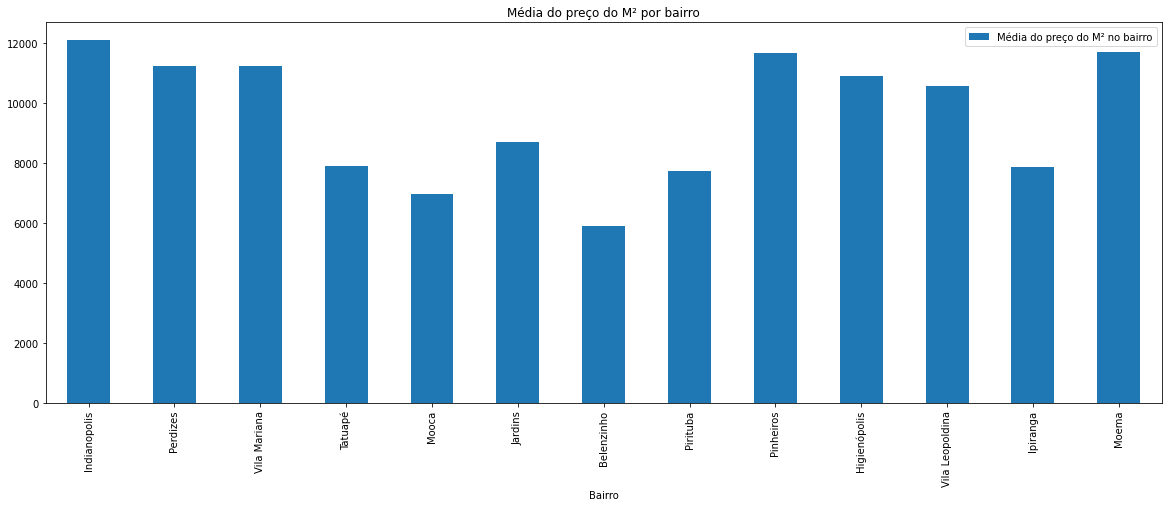

In [ ]:
Bairro_dados.plot(figsize=(20, 7),kind='bar',x='Bairro',y='Média do preço do M² no bairro')
plt.title("Média do preço do M² por bairro")


Text(0.5, 1.0, 'Mediana do preço do M² por bairro')

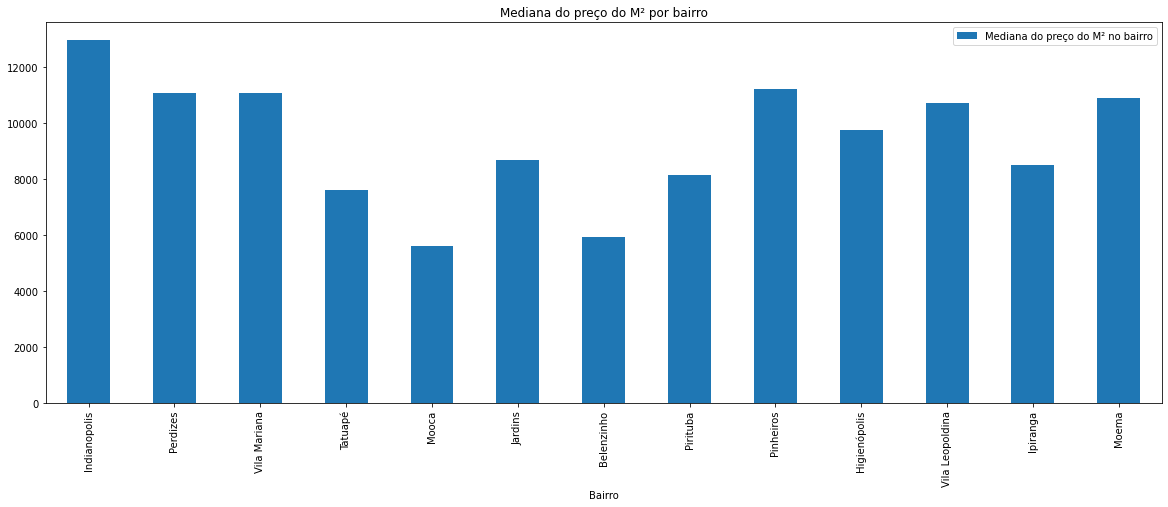

In [ ]:
Bairro_dados.plot(figsize=(20, 7),kind='bar',x='Bairro',y='Mediana do preço do M² no bairro')
plt.title("Mediana do preço do M² por bairro")

###Ao fazer uma análise final dos dados por meio dos gráficos mostrados acima, podemos ver que ***o bairro significa muito no valor do metro quadrado***, bons exemplos disso são os bairros de Indianópolis e Belenzinho. Enquanto Belenzinho mantém um valor similar tanto na média quanto na mediana, bem próximo de 6000, Indianópolis chega ao dobro disso, até ultrapassando a faixa de 12000 na média, isso se deve pelo fato de ser uma região historicamente mais nobre, e portanto valendo mais. Essas diferenças históricas, o quanto o bairro é seguro, ou até a proximidade de locais específicos podem influenciar no preço do metro quadrado, tornando assim o bairro como um fato importante na hora de comprar um imóvel.